In [53]:
import pandas as pd
import numpy as np
from prophet import Prophet


In [54]:
df = pd.read_csv("measurements")
df.head()

,Unnamed: 0,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID,Week,Date
0,229,Satine,RGB_1.png,Depth_1.png,2.6,0.14,8.2,12.0,80.6,1,2021-W1,2021-01-04
1,362,Satine,RGB_2.png,Depth_2.png,2.1,0.10,8.5,8.2,67.4,2,2021-W1,2021-01-04
2,258,Satine,RGB_3.png,Depth_3.png,2.0,0.09,7.5,9.5,65.0,3,2021-W1,2021-01-04
3,263,Satine,RGB_4.png,Depth_4.png,2.7,0.13,6.0,10.6,78.7,4,2021-W1,2021-01-04
4,224,Lugano,RGB_5.png,Depth_5.png,2.3,0.11,8.3,9.8,73.9,5,2021-W1,2021-01-04


In [55]:
def create_prophet_datframe(Y):
    df_proph=df[['Date',Y]].copy(deep=True)
    df_proph['Date']=pd.to_datetime(df_proph['Date'])
    df_proph.rename(columns = {'Date':'ds'}, inplace = True)
    df_proph.rename(columns = { Y :'y'}, inplace = True)

    return df_proph




In [56]:
def fit_propher_model(df):
    m = Prophet()
    m.fit(df_proph)

    return m


In [58]:

df_proph_diameter = create_prophet_datframe("Diameter")
diameter_proph_model = fit_propher_model(df_proph_diameter)
future = diameter_proph_model.make_future_dataframe(periods=365)
future.tail()

20:20:38 - cmdstanpy - INFO - Chain [1] start processing
20:20:38 - cmdstanpy - INFO - Chain [1] done processing


,ds
367,2022-02-11
368,2022-02-12
369,2022-02-13
370,2022-02-14
371,2022-02-15


In [59]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
367,2022-02-11,-451.434300,-3759.736994,3187.613429
368,2022-02-12,-453.306443,-3773.127396,3185.629975
369,2022-02-13,-455.178586,-3787.705206,3171.468218
370,2022-02-14,-457.050729,-3802.058066,3196.098362
371,2022-02-15,-458.922872,-3831.451809,3235.464596


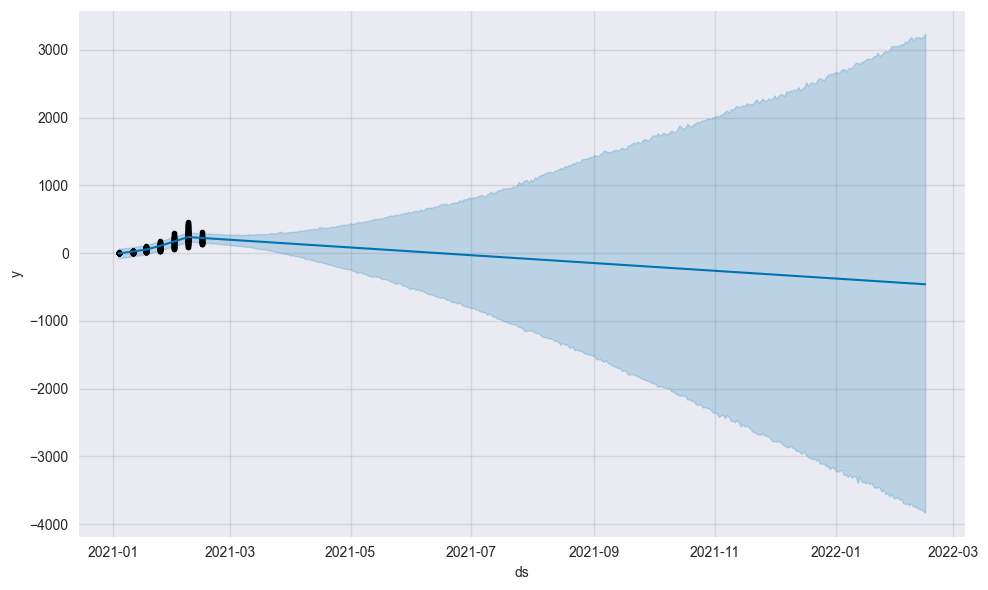

In [60]:
fig1 = m.plot(forecast)

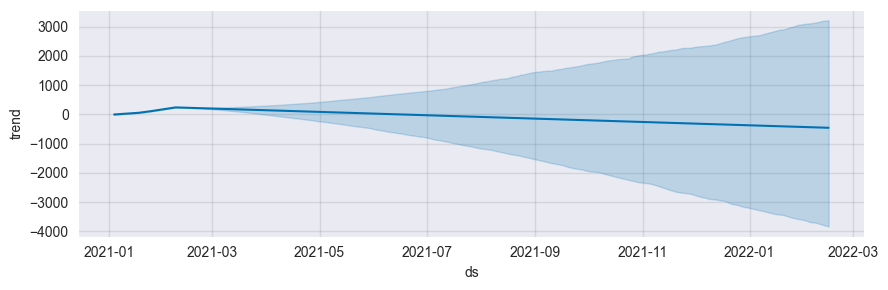

In [61]:
fig2 = m.plot_components(forecast)